In [25]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import os,sys,fnmatch,time
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/transport_fluxes/')
import functions_transport_W
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

In [2]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'

filename = '1_mesh_mask.nc'
gdepwI, tmaskI, mbathyI, e1tI, e2tI = functions_transport_W.get_variables_planes(dirname, filename)

filename = '1_mesh_mask_nocanyon.nc'
gdepwIn, tmaskIn, mbathyIn, e1tIn, e2tIn = functions_transport_W.get_variables_planes(dirname, filename)

#--------------------------------------------------------------------------------------------------

dirname = '/ocean/imachuca/Canyons/results_mackenzie/realistic/sbcana_forcings/agrif_wind_timestep/'

filename = 'canyoncase/1_mesh_mask.nc'
gdepwR, tmaskR, mbathyR, e1tR, e2tR = functions_transport_W.get_variables_planes(dirname, filename)

filename = 'nocanyon/1_mesh_mask.nc'
gdepwRn, tmaskRn, mbathyRn, e1tRn, e2tRn = functions_transport_W.get_variables_planes(dirname, filename)


In [14]:
def format_ax(ax, var):
    ax.set_ylim([0, var.shape[-2]])
    ax.set_xlim([0, var.shape[-1]])

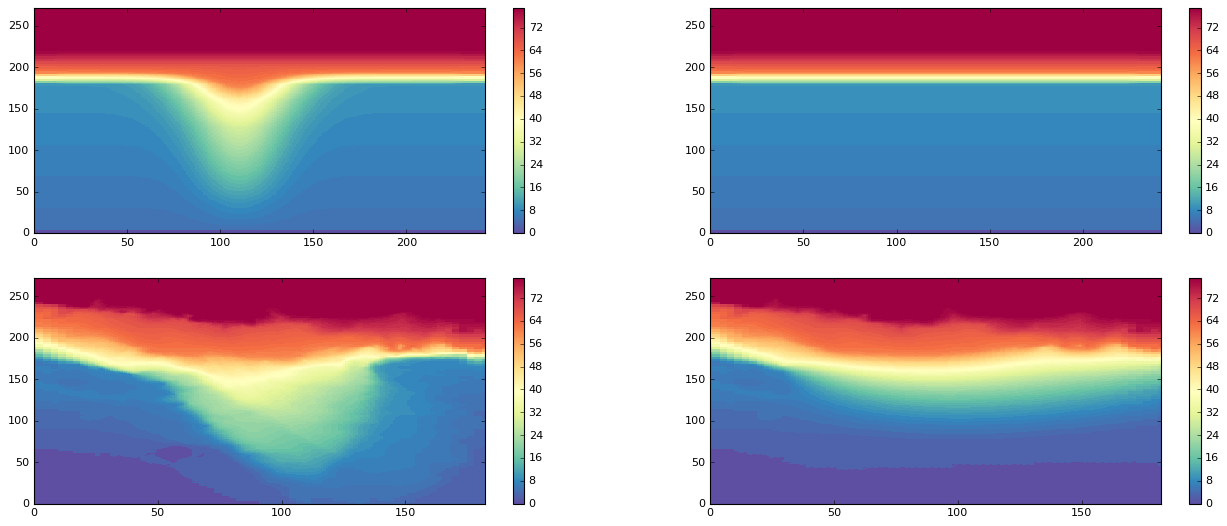

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
for ax, n, this in zip(axes.flatten(), np.arange(4), [mbathyI, mbathyIn, mbathyR, mbathyRn]):
    p = ax.pcolormesh(this, cmap=cm.Spectral_r)
    format_ax(ax, this)
    fig.colorbar(p, ax=ax)

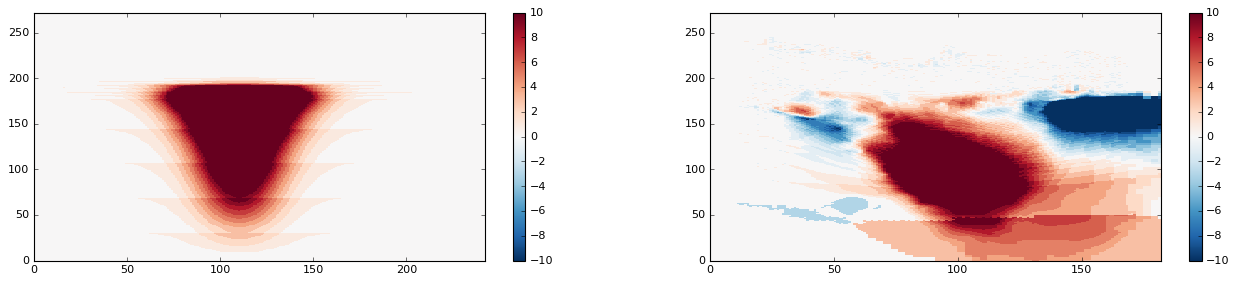

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
vmax = 10
p1 = ax1.pcolormesh(mbathyI - mbathyIn, cmap=cm.RdBu_r, vmin=-vmax, vmax=vmax)
p2 = ax2.pcolormesh(mbathyR - mbathyRn, cmap=cm.RdBu_r, vmin=-vmax, vmax=vmax)
fig.colorbar(p1, ax=ax1)
fig.colorbar(p2, ax=ax2)
format_ax(ax1,mbathyI)
format_ax(ax2,mbathyR)

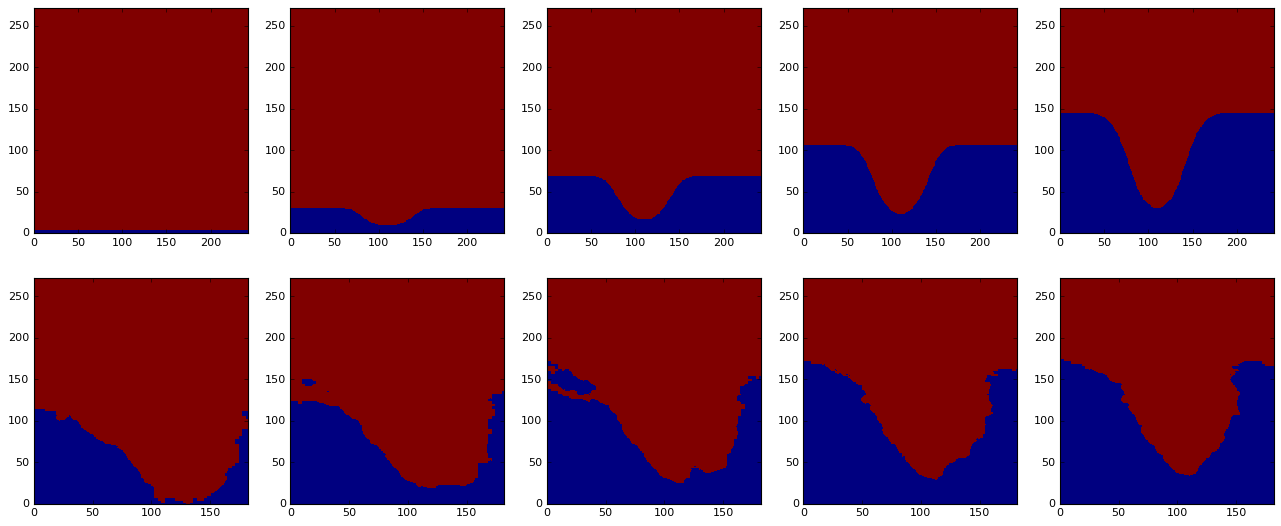

In [42]:
levels= np.arange(4,9)
fig, (axI, axR) = plt.subplots(2, 5, figsize=(20, 8))
for ax, n in zip(axI.flatten(), levels):
    this_tmask = tmaskI[n]
    ax.pcolormesh(this_tmask)
    format_ax(ax, this_tmask)
for ax, n in zip(axR.flatten(), levels):
    this_tmask = tmaskR[n]
    ax.pcolormesh(this_tmask)
    format_ax(ax, this_tmask)

In [34]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
fname = "1_MCKNZ_1h_20170101_20170120_*"
time_ind = 3*24
y,x = slice(1,-1,None), slice(1,-1,None)
    
filesT = general_functions.get_files(dirname, fname, 'grid_T')
filesU = general_functions.get_files(dirname, fname, 'grid_U')

with scDataset(filesT) as dsT, scDataset(filesU) as dsU:
    deptht = dsT.variables['deptht'][:]
    vosaline0 = dsT.variables['vosaline'][time_ind, :, y, x]
    sozotaux = dsU.variables['sozotaux'][:,0,0] 

In [35]:
vosaline0.shape

(80, 272, 242)

In [38]:
with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as dsM:
    tmask = dsM.variables['tmask'][0, :, y, x]

In [37]:
tmask0.shape

(80, 272, 242)

In [39]:
vosaline = np.ma.array(vosaline0, mask=1 - tmask)